In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
df = pd.read_csv('multiTimeline.csv',skiprows=1) 

#구글트렌드 자료(다이어트 관련) 
df.head() 

,2004-01,100,31,48
0,2004-02,76,26,48
1,2004-03,68,24,47
2,2004-04,70,22,47
3,2004-05,73,23,43
4,2004-06,66,24,44


In [2]:
#컬럼명 지정 
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-02,76,26,48
1,2004-03,68,24,47
2,2004-04,70,22,47
3,2004-05,73,23,43
4,2004-06,66,24,44


In [3]:
df.month = pd.to_datetime(df.month) 

# index 설정
df.set_index('month',inplace=True) 

df.head() 

,diet,gym,finance
month,,,
2004-02-01,76,26,48
2004-03-01,68,24,47
2004-04-01,70,22,47
2004-05-01,73,23,43
2004-06-01,66,24,44


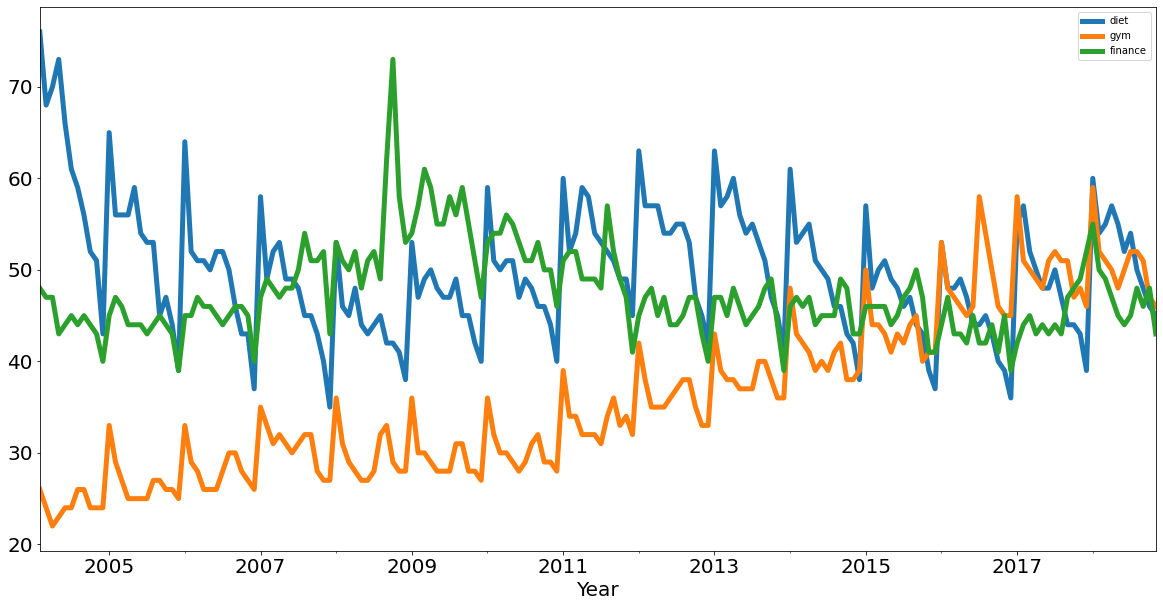

In [4]:
#3개의 컬럼에 대한 시계열 곡선

df.plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=20); 

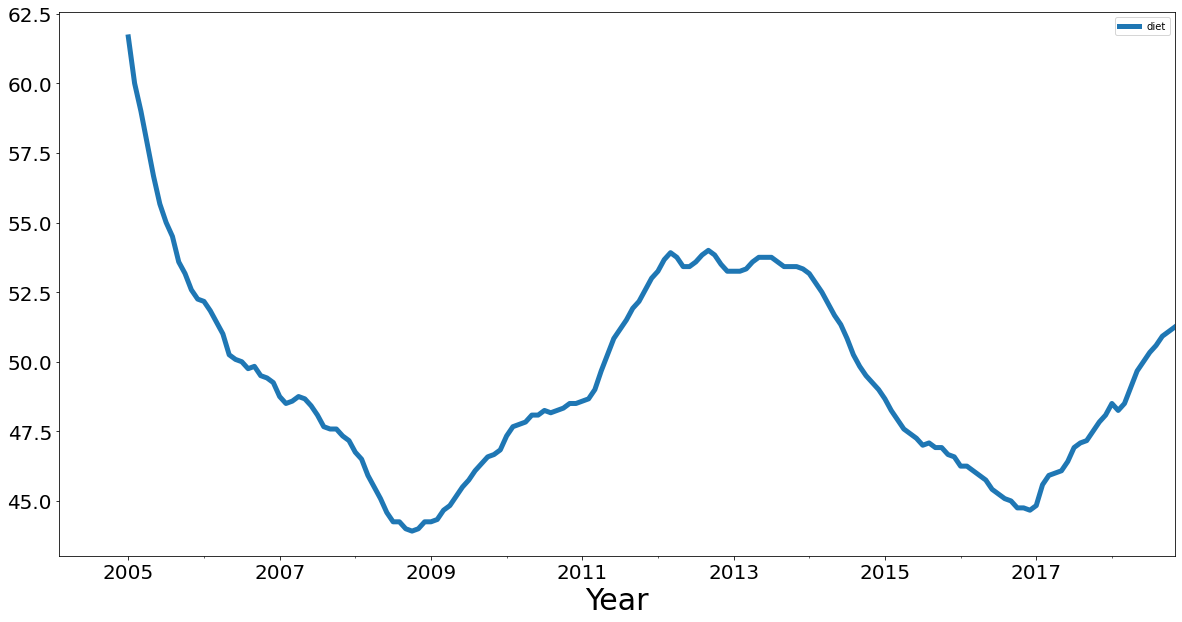

In [5]:
#12사이즈의 이동평균

diet = df[['diet']] 
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=30); 

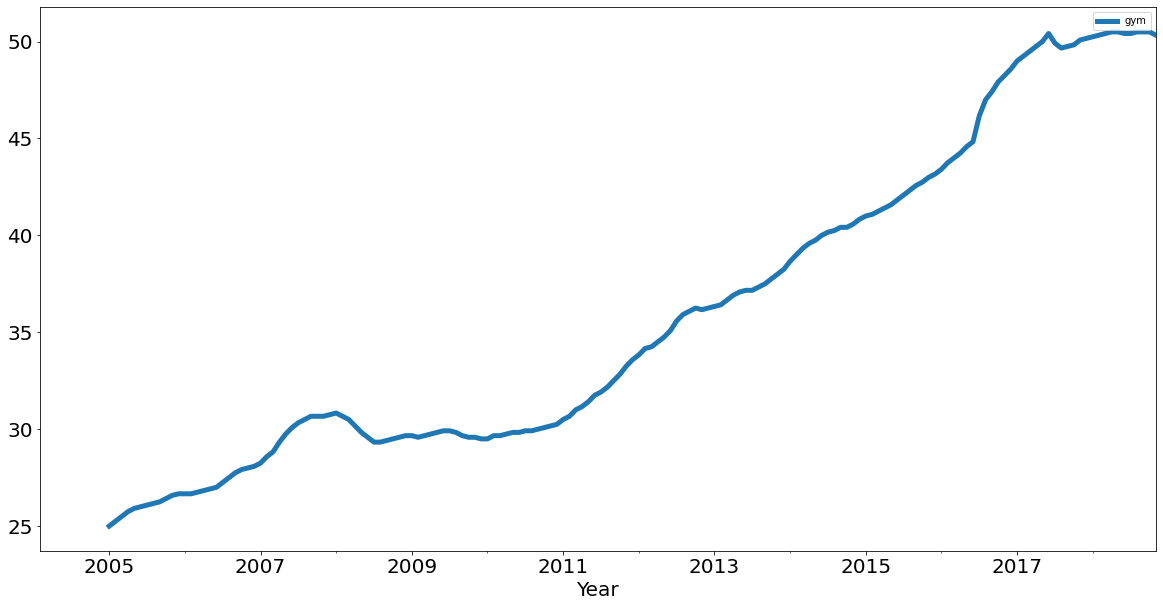

In [6]:
#gym에 대한 이동평균

gym = df[['gym']] 
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=20); 

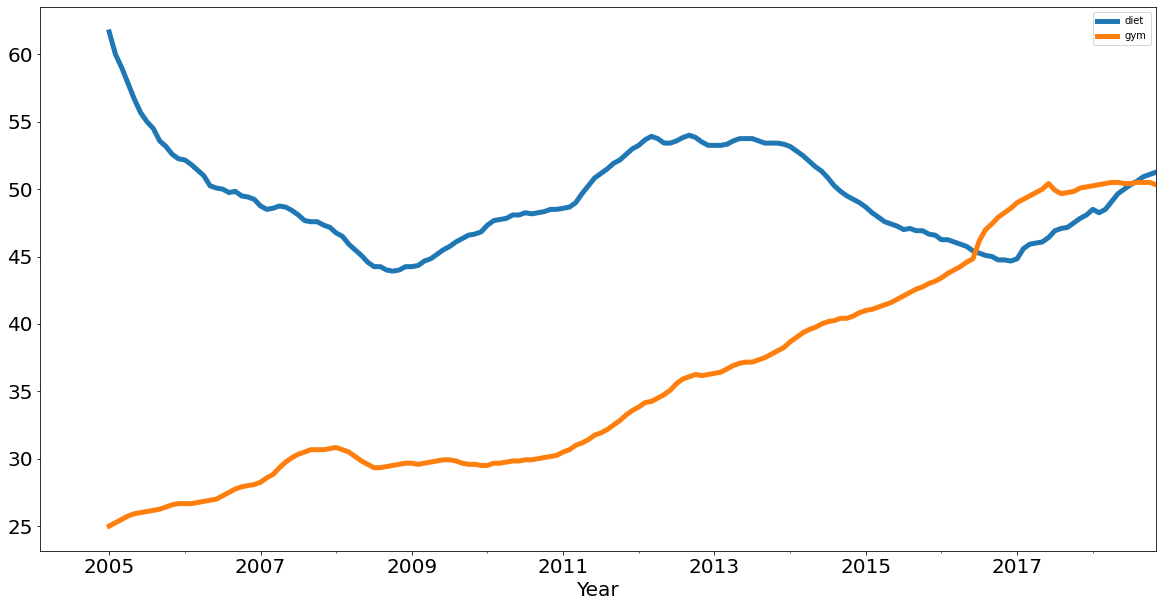

In [7]:
#2개의 이동평균 곡선을 같이 보여준다. 

df_dg = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1) 
df_dg.plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=20); 

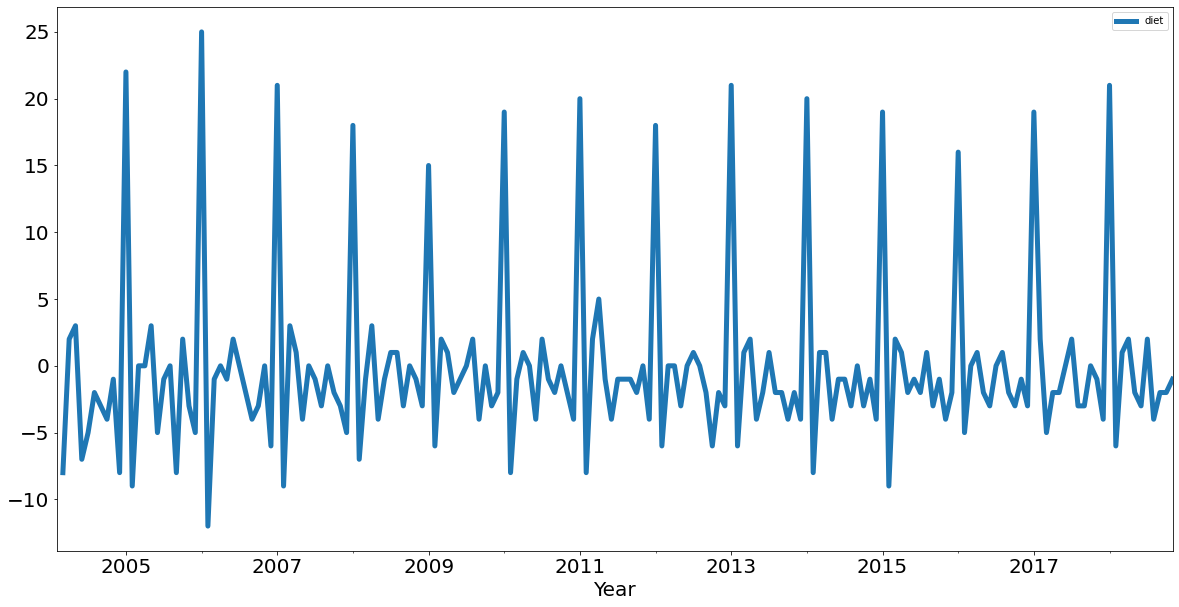

In [8]:
#다이어트 곡선에 대한 차분그래프 

diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=20); 

In [9]:
#컬럼간의 상관관계 행렬

df.corr() 

,diet,gym,finance
diet,1.000000,-0.039623,-0.041780
gym,-0.039623,1.000000,-0.229946
finance,-0.041780,-0.229946,1.000000


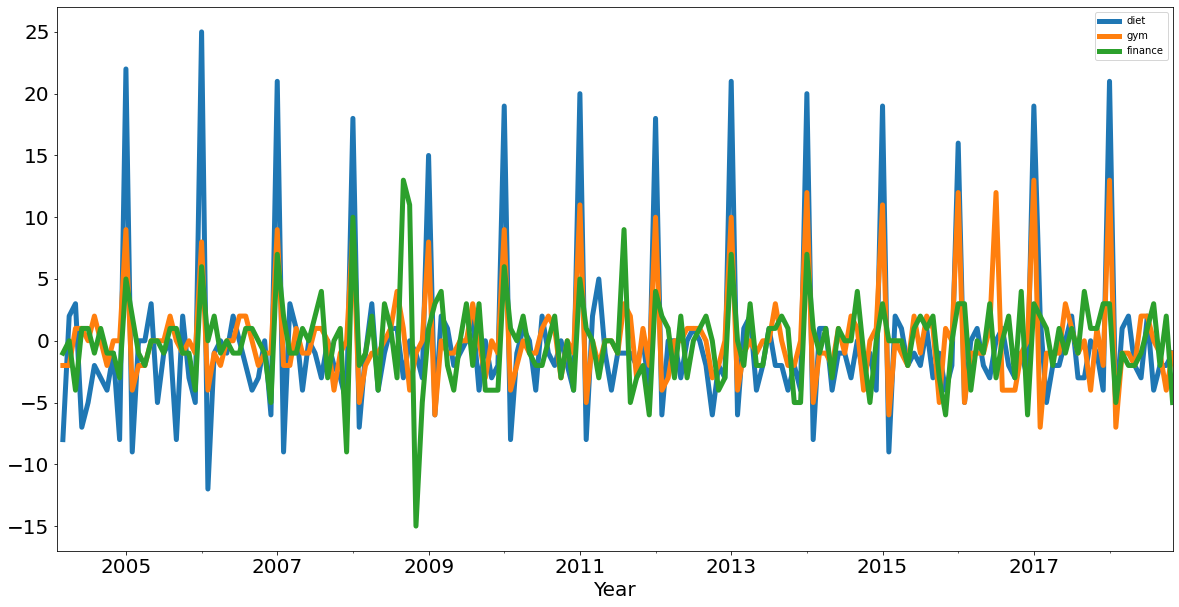

In [10]:
#3개의 속성에 대한 차분그래프

df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20) 
plt.xlabel('Year', fontsize=20);

In [11]:
#차분에 대한 상관관계 행렬 

df.diff().corr() 

,diet,gym,finance
diet,1.000000,0.800682,0.397953
gym,0.800682,1.000000,0.342698
finance,0.397953,0.342698,1.000000
